# 텐서 생성부터 최적화까지 (~87p)

In [1]:
# 03장 파이토치 기초/예제 3.01 텐서 생성

import torch

print(torch.tensor([1, 2, 3])) # 입력의 자료형을 그대로 복사
print(torch.Tensor([[1, 2, 3], [4, 5, 6]])) # 기본형 텐서 (32비트 부동소수점 float)
print(torch.LongTensor([1, 2, 3])) # 정수 Long 형의 텐서 
print(torch.FloatTensor([1, 2, 3])) # 64비트 부동소수점 float 형의 텐서

tensor([1, 2, 3])
tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor([1, 2, 3])
tensor([1., 2., 3.])


In [2]:
# 03장 파이토치 기초/예제 3.02 텐서 속성

import torch

tensor = torch.rand(1, 2) # 1보다 작은 숫자를 랜덤으로 뽑아서, 1x2 형태의 텐서에 할당
print(tensor) # 랜덤으로 할당된 텐서를 출력
print(tensor.shape) # 텐서의 차원을 출력 (shape)
print(tensor.dtype) # 텐서의 데이터타입=자료형을 출력 (dtype)
print(tensor.device) # 텐서의 디바이스를 출력 (device)

tensor([[0.3821, 0.3377]])
torch.Size([1, 2])
torch.float32
cpu


In [3]:
# 03장 파이토치 기초/예제 3.03 텐서 차원 변환

import torch

tensor = torch.rand(1, 2)
print(tensor)
print(tensor.shape)

tensor = tensor.reshape(2, 1) # reshape 메소드로 텐서를 2행 1열의 수직 구조로 차원 변환
print(tensor)
print(tensor.shape) # 변환된 차원을 출력

tensor([[0.4203, 0.1743]])
torch.Size([1, 2])
tensor([[0.4203],
        [0.1743]])
torch.Size([2, 1])


In [4]:
# 03장 파이토치 기초/예제 3.04 텐서 자료형 설정

import torch

tensor = torch.rand((3, 3), dtype=torch.float) # 1보다 작은 숫자를 랜덤으로 뽑아서, 3x3 형태의 텐서에 할당
print(tensor)

tensor([[0.7711, 0.3723, 0.6124],
        [0.1127, 0.6084, 0.7319],
        [0.0574, 0.6367, 0.4691]])


In [5]:
# 03장 파이토치 기초/예제 3.05 텐서 GPU 장치 설정

import torch

device = "cuda" if torch.cuda.is_available() else "cpu" # gpu 가 없어서 에러 발생
cpu = torch.FloatTensor([1, 2, 3]) # cpu 변수에 텐서 생성 
gpu = torch.cuda.FloatTensor([1, 2, 3]) # gpu 변수에 cuda 속성을 이용한 텐서 생성
tensor = torch.rand((1, 1), device=device) # 1x1의 1 이하 무작위 텐서, device 에 대한 정보
print(device)
print(cpu)
print(gpu)
print(tensor)

TypeError: type torch.cuda.FloatTensor not available. Torch not compiled with CUDA enabled.

In [6]:
# 03장 파이토치 기초/예제 3.06 텐서 장치 변환

import torch

cpu = torch.FloatTensor([1, 2, 3])
gpu = cpu.cuda() # gpu 가 없어서 에러 발생
gpu2cpu = gpu.cpu() # gpu 를 cpu 로 변환
cpu2gpu = cpu.to("cuda") # cuda 를 이용해서 cpu 로
print(cpu)
print(gpu)
print(gpu2cpu)
print(cpu2gpu)

AssertionError: Torch not compiled with CUDA enabled

In [3]:
# 03장 파이토치 기초/예제 3.07 넘파이 배열의 텐서 변환

import torch
import numpy as np

ndarray = np.array([1, 2, 3], dtype=np.uint8) # [1,2,3] 의 넘파이 배열 선언
print(torch.tensor(ndarray)) # 넘파이 배열을 복사형 텐서로 변환 (똑같이 출력한다)
print(torch.Tensor(ndarray)) # 넘파이 배열을 기본형 텐서로 변환
print(torch.from_numpy(ndarray)) # 넘파이 배열을 텐서로 변환

tensor([1, 2, 3], dtype=torch.uint8)
tensor([1., 2., 3.])
tensor([1, 2, 3], dtype=torch.uint8)


In [4]:
# 03장 파이토치 기초/예제 3.08 텐서의 넘파이 배열 변환

import torch

tensor = torch.cuda.FloatTensor([1, 2, 3]) # 기본형 텐서를 생성
ndarray = tensor.detach().cpu().numpy() # numpy 로 변환하고, cpu 로 장치 변환하고, datach 까지
print(ndarray)
print(type(ndarray)) # ndarray 의 타입을 출력 (class numpy.ndarray)

TypeError: type torch.cuda.FloatTensor not available. Torch not compiled with CUDA enabled.

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


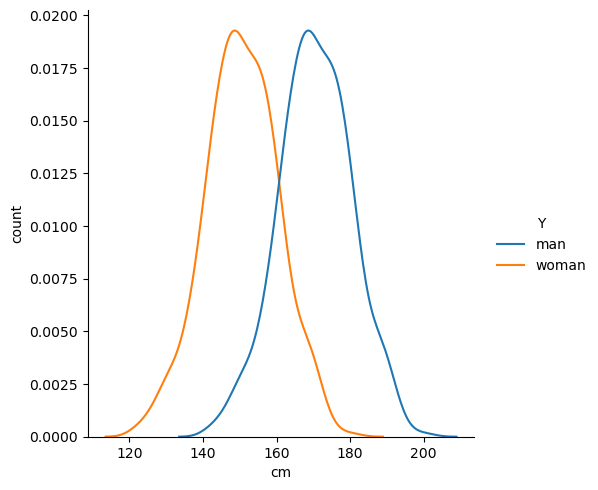

In [1]:
# 03장 파이토치 기초/예제 3.09~3.10 비쌍체 t-검정

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt


man_height = stats.norm.rvs(loc=170, scale=10, size=500, random_state=1) # 남자 키 값 (평균 170, 표준편차 10 을 따르는 500개의 값)
woman_height = stats.norm.rvs(loc=150, scale=10, size=500, random_state=1) # 여자 키 값 (평균 150, 표준편차 10 을 따르는 500개의 값)

X = np.concatenate([man_height, woman_height]) # 독립 변수 X에 할당 
Y = ["man"] * len(man_height) + ["woman"] * len(woman_height) # 종속 변수 Y에 할당

df = pd.DataFrame(list(zip(X, Y)), columns=["X", "Y"]) 
fig = sns.displot(data=df, x="X", hue="Y", kind="kde")
fig.set_axis_labels("cm", "count")
plt.show()

In [5]:
# 03장 파이토치 기초/예제 3.09~3.10 비쌍체 t-검정

# 서로 독립된 두 집단 man과 woman 에 대해 비쌍체 t-검정
# 이를 통해 두 모집단 데이터 간의 통계적 유의성을 확인하고자 함
statistic, pvalue = stats.ttest_ind(man_height, woman_height, equal_var=True)

print("statistic:", statistic) # static 이 크고, pvalue 가 작으면 대립가설이 유력
print("pvalue :", pvalue)
print("*:", pvalue < 0.05) # pvalue 가 0.5 보다 작으면 * 로 표기 (통계적 유의성이 있다고 봄)
print("**:", pvalue < 0.001) # pvalue 가 0.05 보다 작으면 * 로 표기 (통계적 유의성이 크다고 봄)

statistic: 31.96162891312776
pvalue : 6.2285854381989205e-155
*: True
**: True


In [6]:
# 03장 파이토치 기초/예제 3.11~3.17 단순 선형 회귀(넘파이)

import numpy as np

# 넘파이 형태의 두 데이터 생성
x = np.array(
    [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10],
    [11], [12], [13], [14], [15], [16], [17], [18], [19], [20],
    [21], [22], [23], [24], [25], [26], [27], [28], [29], [30]]
)
y = np.array(
    [[0.94], [1.98], [2.88], [3.92], [3.96], [4.55], [5.64], [6.3], [7.44], [9.1],
    [8.46], [9.5], [10.67], [11.16], [14], [11.83], [14.4], [14.25], [16.2], [16.32],
    [17.46], [19.8], [18], [21.34], [22], [22.5], [24.57], [26.04], [21.6], [28.8]]
)

# 하이퍼파라미터 초기화
weight = 0.0
bias = 0.0
learning_rate = 0.005

for epoch in range(10000): #10,000 에폭 
    y_hat = weight * x + bias # 가설 선언
    cost = ((y - y_hat) ** 2).mean() # 손실 함수 선언

    weight = weight - learning_rate * ((y_hat - y) * x).mean() # 최적화를 가중치에 적용
    bias = bias - learning_rate * (y_hat - y).mean() # 최적화를 편향에 적용

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch : {epoch+1:4d}, Weight : {weight:.3f}, Bias : {bias:.3f}, Cost : {cost:.3f}")

Epoch : 1000, Weight : 0.872, Bias : -0.290, Cost : 1.377
Epoch : 2000, Weight : 0.877, Bias : -0.391, Cost : 1.373
Epoch : 3000, Weight : 0.878, Bias : -0.422, Cost : 1.372
Epoch : 4000, Weight : 0.879, Bias : -0.432, Cost : 1.372
Epoch : 5000, Weight : 0.879, Bias : -0.435, Cost : 1.372
Epoch : 6000, Weight : 0.879, Bias : -0.436, Cost : 1.372
Epoch : 7000, Weight : 0.879, Bias : -0.436, Cost : 1.372
Epoch : 8000, Weight : 0.879, Bias : -0.436, Cost : 1.372
Epoch : 9000, Weight : 0.879, Bias : -0.436, Cost : 1.372
Epoch : 10000, Weight : 0.879, Bias : -0.436, Cost : 1.372


In [7]:
# 03장 파이토치 기초/예제 3.18~3.24 단순 선형 회귀(파이토치)


import torch
from torch import optim

# 텐서 형태의 두 데이터 선언 
x = torch.FloatTensor([ 
    [1], [2], [3], [4], [5], [6], [7], [8], [9], [10],
    [11], [12], [13], [14], [15], [16], [17], [18], [19], [20],
    [21], [22], [23], [24], [25], [26], [27], [28], [29], [30]
])
y = torch.FloatTensor([
    [0.94], [1.98], [2.88], [3.92], [3.96], [4.55], [5.64], [6.3], [7.44], [9.1],
    [8.46], [9.5], [10.67], [11.16], [14], [11.83], [14.4], [14.25], [16.2], [16.32],
    [17.46], [19.8], [18], [21.34], [22], [22.5], [24.57], [26.04], [21.6], [28.8]
])
 
weight = torch.zeros(1, requires_grad=True) # weight 을 0값의 텐서로 초기화
bias = torch.zeros(1, requires_grad=True) # bias 을 0값의 텐서로 초기화
learning_rate = 0.001

optimizer = optim.SGD([weight, bias], lr=learning_rate) # 최적화 함수는 SGD 로 역전파 수행


for epoch in range(10000):
    hypothesis = weight * x + bias # 가설 선언
    cost = torch.mean((hypothesis - y) ** 2) # 손실 함수 선언

    # 가중치와 편향 갱신의 3단계
    optimizer.zero_grad() # 기울기 초기화
    cost.backward() # 역전파 연산
    optimizer.step() # 계산된 변수를 적용

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch : {epoch+1:4d}, Weight : {weight.item():.3f}, Bias : {bias.item():.3f}, Cost : {cost:.3f}")

Epoch : 1000, Weight : 0.864, Bias : -0.138, Cost : 1.393
Epoch : 2000, Weight : 0.870, Bias : -0.251, Cost : 1.380
Epoch : 3000, Weight : 0.873, Bias : -0.321, Cost : 1.375
Epoch : 4000, Weight : 0.875, Bias : -0.364, Cost : 1.373
Epoch : 5000, Weight : 0.877, Bias : -0.391, Cost : 1.373
Epoch : 6000, Weight : 0.878, Bias : -0.408, Cost : 1.372
Epoch : 7000, Weight : 0.878, Bias : -0.419, Cost : 1.372
Epoch : 8000, Weight : 0.878, Bias : -0.425, Cost : 1.372
Epoch : 9000, Weight : 0.879, Bias : -0.429, Cost : 1.372
Epoch : 10000, Weight : 0.879, Bias : -0.432, Cost : 1.372


In [8]:
# 03장 파이토치 기초/예제 3.25 zero_grad(), cost.backward(), optimizer.step()

import torch
from torch import optim


x = torch.FloatTensor([
    [1], [2], [3], [4], [5], [6], [7], [8], [9], [10],
    [11], [12], [13], [14], [15], [16], [17], [18], [19], [20],
    [21], [22], [23], [24], [25], [26], [27], [28], [29], [30]
])
y = torch.FloatTensor([
    [0.94], [1.98], [2.88], [3.92], [3.96], [4.55], [5.64], [6.3], [7.44], [9.1],
    [8.46], [9.5], [10.67], [11.16], [14], [11.83], [14.4], [14.25], [16.2], [16.32],
    [17.46], [19.8], [18], [21.34], [22], [22.5], [24.57], [26.04], [21.6], [28.8]
])

weight = torch.zeros(1, requires_grad=True) # weight 을 0값의 텐서로 생성
bias = torch.zeros(1, requires_grad=True) # bias 을 0값의 텐서로 생성
learning_rate = 0.001

optimizer = optim.SGD([weight, bias], lr=learning_rate) # 최적화 함수는 SGD 로 역전파 수행

for epoch in range(10000):
    hypothesis = weight * x + bias # 가설 선언
    cost = torch.mean((hypothesis - y) ** 2) # 손실 함수 선언
    
    print(f"Epoch : {epoch+1:4d}")
    print(f"Step [1] : Gradient : {weight.grad}, Weight : {weight.item():.5f}")

    # 가중치와 편향 갱신의 3단계
    optimizer.zero_grad()
    print(f"Step [2] : Gradient : {weight.grad}, Weight : {weight.item():.5f}")

    cost.backward()
    print(f"Step [3] : Gradient : {weight.grad}, Weight : {weight.item():.5f}")

    optimizer.step()
    print(f"Step [4] : Gradient : {weight.grad}, Weight : {weight.item():.5f}")
    
    if epoch == 3:
        break

Epoch :    1
Step [1] : Gradient : None, Weight : 0.00000
Step [2] : Gradient : None, Weight : 0.00000
Step [3] : Gradient : tensor([-540.4854]), Weight : 0.00000
Step [4] : Gradient : tensor([-540.4854]), Weight : 0.54049
Epoch :    2
Step [1] : Gradient : tensor([-540.4854]), Weight : 0.54049
Step [2] : Gradient : None, Weight : 0.54049
Step [3] : Gradient : tensor([-198.9818]), Weight : 0.54049
Step [4] : Gradient : tensor([-198.9818]), Weight : 0.73947
Epoch :    3
Step [1] : Gradient : tensor([-198.9818]), Weight : 0.73947
Step [2] : Gradient : None, Weight : 0.73947
Step [3] : Gradient : tensor([-73.2604]), Weight : 0.73947
Step [4] : Gradient : tensor([-73.2604]), Weight : 0.81273
Epoch :    4
Step [1] : Gradient : tensor([-73.2604]), Weight : 0.81273
Step [2] : Gradient : None, Weight : 0.81273
Step [3] : Gradient : tensor([-26.9772]), Weight : 0.81273
Step [4] : Gradient : tensor([-26.9772]), Weight : 0.83970


In [9]:
# 03장 파이토치 기초/예제 3.26~3.28 신경망 패키지 적용

import torch
from torch import nn
from torch import optim

x = torch.FloatTensor([
    [1], [2], [3], [4], [5], [6], [7], [8], [9], [10],
    [11], [12], [13], [14], [15], [16], [17], [18], [19], [20],
    [21], [22], [23], [24], [25], [26], [27], [28], [29], [30]
])
y = torch.FloatTensor([
    [0.94], [1.98], [2.88], [3.92], [3.96], [4.55], [5.64], [6.3], [7.44], [9.1],
    [8.46], [9.5], [10.67], [11.16], [14], [11.83], [14.4], [14.25], [16.2], [16.32],
    [17.46], [19.8], [18], [21.34], [22], [22.5], [24.57], [26.04], [21.6], [28.8]
])

model = nn.Linear(1, 1) # 선형 변환 클래스의 매개변수를 사용해서 weight 과 bias 생성
criterion = nn.MSELoss() # MSE 로 손실을 계산 -> 매개변수 필요 X
optimizer = optim.SGD(model.parameters(), lr=0.001) # 모델의 파라미터로 역전파 연산을 수행

for epoch in range(10000): 
    output = model(x) # 가설은 선언한 모델을 이용해 선언
    cost = criterion(output, y) # 손실 함수는 criterion 에 할당한 MSE 

    optimizer.zero_grad() # 가중치와 편향 갱신을 위한 3단게
    cost.backward()
    optimizer.step()

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch : {epoch+1:4d}, Model : {list(model.parameters())}, Cost : {cost:.3f}")

Epoch : 1000, Model : [Parameter containing:
tensor([[0.8756]], requires_grad=True), Parameter containing:
tensor([-0.3697], requires_grad=True)], Cost : 1.373
Epoch : 2000, Model : [Parameter containing:
tensor([[0.8769]], requires_grad=True), Parameter containing:
tensor([-0.3947], requires_grad=True)], Cost : 1.373
Epoch : 3000, Model : [Parameter containing:
tensor([[0.8776]], requires_grad=True), Parameter containing:
tensor([-0.4103], requires_grad=True)], Cost : 1.372
Epoch : 4000, Model : [Parameter containing:
tensor([[0.8781]], requires_grad=True), Parameter containing:
tensor([-0.4200], requires_grad=True)], Cost : 1.372
Epoch : 5000, Model : [Parameter containing:
tensor([[0.8784]], requires_grad=True), Parameter containing:
tensor([-0.4260], requires_grad=True)], Cost : 1.372
Epoch : 6000, Model : [Parameter containing:
tensor([[0.8786]], requires_grad=True), Parameter containing:
tensor([-0.4298], requires_grad=True)], Cost : 1.372
Epoch : 7000, Model : [Parameter contain

# 데이터세트와 데이터로더부터 퍼셉트론까지 (~159p)

In [1]:
import torch
from torch import nn
from torch import optim
# 데이터세트와 데이터로더를 import
from torch.utils.data import TensorDataset, DataLoader 

# 다중 선형 회귀 -> X 와 Y 데이터를 (n,2) 차원 형태로 선언한다
train_x = torch.FloatTensor([
    [1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7]
])
train_y = torch.FloatTensor([ # 정답값
    [0.1, 1.5], [1, 2.8], [1.9, 4.1], [2.8, 5.4], [3.7, 6.7], [4.6, 8]
])

train_dataset = TensorDataset(train_x, train_y)
# 데이터로더에서 배치 사이즈를 2로 설정, shuffle=True 로 데이터 순서를 변경, 
# drop_last=True 로 나머지 데이터는 사용하지 않음
train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True, drop_last=True)

# 모델 구조는 선형 변환 클래스를 사용하고, 입력/출력 데이터 차원은 2
model = nn.Linear(2, 2, bias=True) 
criterion = nn.MSELoss() # 손실은 평균오차제곱으로 계산
optimizer = optim.SGD(model.parameters(), lr=0.001) # 경사하강법으로 역전파 연산을 통해 최적화

for epoch in range(20000):
    cost = 0.0 # 에폭마다 오차를 계산하기 위해서 포기화
    
    for batch in train_dataloader:
        x, y = batch # batch 변수에는 데이터세트에 입력한 순서대로 입력/출력값 x,y 가 저장되어 있음.
        output = model(x)
        
        loss = criterion(output, y) # 결과값과 정답값을 비교해서 손실 계산
        
        # SGD 의 3단계
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
         
        cost += loss #배치마다 오차에 손실값을 누적해서 더함


		# 오차의 평균값 계산하기 위해 len 메소드 사용하여 데이터로더의 길이를 구해서 나눔
    cost = cost / len(train_dataloader)
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch : {epoch+1:4d}, Model : {list(model.parameters())}, Cost : {cost:.3f}")

Epoch : 1000, Model : [Parameter containing:
tensor([[0.5571, 0.2085],
        [0.7898, 0.4539]], requires_grad=True), Parameter containing:
tensor([-0.4419, -0.0167], requires_grad=True)], Cost : 0.037
Epoch : 2000, Model : [Parameter containing:
tensor([[0.6936, 0.1378],
        [0.8470, 0.4243]], requires_grad=True), Parameter containing:
tensor([-0.6492, -0.1035], requires_grad=True)], Cost : 0.010
Epoch : 3000, Model : [Parameter containing:
tensor([[0.7633, 0.1018],
        [0.8761, 0.4093]], requires_grad=True), Parameter containing:
tensor([-0.7548, -0.1477], requires_grad=True)], Cost : 0.003
Epoch : 4000, Model : [Parameter containing:
tensor([[0.7987, 0.0835],
        [0.8910, 0.4016]], requires_grad=True), Parameter containing:
tensor([-0.8086, -0.1702], requires_grad=True)], Cost : 0.001
Epoch : 5000, Model : [Parameter containing:
tensor([[0.8168, 0.0741],
        [0.8985, 0.3977]], requires_grad=True), Parameter containing:
tensor([-0.8360, -0.1817], requires_grad=True)]

In [2]:
import torch
from torch import nn
from torch import optim
# 데이터세트와 데이터로더를 import
from torch.utils.data import TensorDataset, DataLoader 

# 다중 선형 회귀 -> X 와 Y 데이터를 (n,2) 차원 형태로 선언한다
train_x = torch.FloatTensor([
    [1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7]
])
train_y = torch.FloatTensor([ # 정답값
    [0.1, 1.5], [1, 2.8], [1.9, 4.1], [2.8, 5.4], [3.7, 6.7], [4.6, 8]
])

train_dataset = TensorDataset(train_x, train_y)
# 데이터로더에서 배치 사이즈를 2로 설정, shuffle=True 로 데이터 순서를 변경, 
# drop_last=True 로 나머지 데이터는 사용하지 않음
train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True, drop_last=True)

# 모델 구조는 선형 변환 클래스를 사용하고, 입력/출력 데이터 차원은 2
model = nn.Linear(2, 2, bias=False) 
criterion = nn.MSELoss() # 손실은 평균오차제곱으로 계산
optimizer = optim.SGD(model.parameters(), lr=0.001) # 경사하강법으로 역전파 연산을 통해 최적화

for epoch in range(20000):
    cost = 0.0 # 에폭마다 오차를 계산하기 위해서 포기화
    
    for batch in train_dataloader:
        x, y = batch # batch 변수에는 데이터세트에 입력한 순서대로 입력/출력값 x,y 가 저장되어 있음.
        output = model(x)
        
        loss = criterion(output, y) # 결과값과 정답값을 비교해서 손실 계산
        
        # SGD 의 3단계
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

         
        cost += loss #배치마다 오차에 손실값을 누적해서 더함


		# 오차의 평균값 계산하기 위해 len 메소드 사용하여 데이터로더의 길이를 구해서 나눔
        cost = cost / len(train_dataloader)
        
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch : {epoch+1:4d}, Model : {list(model.parameters())}, Cost : {cost:.3f}")

Epoch : 1000, Model : [Parameter containing:
tensor([[0.2151, 0.4008],
        [0.5421, 0.6511]], requires_grad=True)], Cost : 0.060
Epoch : 2000, Model : [Parameter containing:
tensor([[0.5198, 0.1542],
        [0.6566, 0.5585]], requires_grad=True)], Cost : 0.037
Epoch : 3000, Model : [Parameter containing:
tensor([[ 0.7620, -0.0416],
        [ 0.7476,  0.4849]], requires_grad=True)], Cost : 0.048
Epoch : 4000, Model : [Parameter containing:
tensor([[ 0.9547, -0.1970],
        [ 0.8200,  0.4265]], requires_grad=True)], Cost : 0.011
Epoch : 5000, Model : [Parameter containing:
tensor([[ 1.1076, -0.3209],
        [ 0.8774,  0.3800]], requires_grad=True)], Cost : 0.019
Epoch : 6000, Model : [Parameter containing:
tensor([[ 1.2293, -0.4192],
        [ 0.9232,  0.3431]], requires_grad=True)], Cost : 0.007
Epoch : 7000, Model : [Parameter containing:
tensor([[ 1.3258, -0.4974],
        [ 0.9594,  0.3137]], requires_grad=True)], Cost : 0.008
Epoch : 8000, Model : [Parameter containing:
tens

In [10]:
import torch
import pandas as pd
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, file_path): # 초기화 메서드
        df = pd.read_csv(file_path) # 파일 경로로 데이터 불러와서 df 에 넣음 
        self.x = df.iloc[:, 0].values # :,0 은 모든 행의 0열을 가져오라는 뜻 -> 입력값
        self.y = df.iloc[:, 1].values # :,1 은 모든 행의 1열을 가져오라는 뜻 -> 정답값
        self.length = len(df)

    def __getitem__(self, index): # 호출 메서드
        x = torch.FloatTensor([self.x[index] ** 2, self.x[index]]) # [x^2, x] 의 구조로 반환
        y = torch.FloatTensor([self.y[index]]) # [y] 의 구조로 반환
        return x, y

    def __len__(self):
        return self.length

class CustomModel(nn.Module):
    def __init__(self):
        super().__init__() # super() 로 부모클래스 초기화
        self.layer = nn.Linear(2, 1) # 2차 이상의 함수이므로 (2,1)의 구조
 
    def forward(self, x):
        x = self.layer(x)
        return x

train_dataset = CustomDataset("../datasets/non_linear.csv")
# 데이터 로더 설정
train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True, drop_last=True)

# GPU 연산 적용
device = "cuda" if torch.cuda.is_available() else "cpu"

# 모델, 손실함수, 최적화함수 선언
model = CustomModel().to(device)
criterion = nn.MSELoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.0001)

for epoch in range(10000):
    cost = 0.0 # 오차 초기화

    for x, y in train_dataloader:
        x = x.to(device)
        y = y.to(device)

        output = model(x)
        loss = criterion(output, y) # 손실 계산
        
		# SGD 의 3단계
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        cost += loss # 오차에 손실을 누적해서 계산

    cost = cost / len(train_dataloader) # 전체 데이터길이를 이용해 손실의 평균을 계산, 갱신

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch : {epoch+1:4d}, Model : {list(model.parameters())}, Cost : {cost:.3f}")

FileNotFoundError: [Errno 2] No such file or directory: '../datasets/non_linear.csv'

In [11]:
import torch
import pandas as pd
from torch import nn
from torch import optim
# split 을 위한 패키지 import 
from torch.utils.data import Dataset, DataLoader, random_split

class CustomDataset(Dataset):
    def __init__(self, file_path):
        df = pd.read_csv(file_path)
        self.x = df.iloc[:, 0].values
        self.y = df.iloc[:, 1].values
        self.length = len(df)

    def __getitem__(self, index):
        x = torch.FloatTensor([self.x[index] ** 2, self.x[index]])
        y = torch.FloatTensor([self.y[index]])
        return x, y

    def __len__(self):
        return self.length


class CustomModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Linear(2, 1)

    def forward(self, x):
        x = self.layer(x)
        return x

dataset = CustomDataset("../datasets/non_linear.csv")
dataset_size = len(dataset)

# 데이터 분리를 위한 코드
train_size = int(dataset_size * 0.8) # 데이터 세트의 합과 전체데이터세트의 개수가 일치할 수 있도록 정수형으로 변환
validation_size = int(dataset_size * 0.1)
test_size = dataset_size - train_size - validation_size

train_dataset, validation_dataset, test_dataset = random_split(dataset, [train_size, validation_size, test_size])
print(f"Training Data Size : {len(train_dataset)}")
print(f"Validation Data Size : {len(validation_dataset)}")
print(f"Testing Data Size : {len(test_dataset)}")

train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True, drop_last=True)
validation_dataloader = DataLoader(validation_dataset, batch_size=4, shuffle=True, drop_last=True)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=True, drop_last=True)

for epoch in range(10000):
    cost = 0.0

    for x, y in train_dataloader:
        x = x.to(device)
        y = y.to(device)

        output = model(x)
        loss = criterion(output, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        cost += loss

    cost = cost / len(train_dataloader)

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch : {epoch+1:4d}, Model : {list(model.parameters())}, Cost : {cost:.3f}")


with torch.no_grad():
    model.eval()
    for x, y in validation_dataloader:
        x = x.to(device)
        y = y.to(device)
        
        outputs = model(x)
        print(f"X : {x}")
        print(f"Y : {y}")
        print(f"Outputs : {outputs}")
        print("--------------------")


FileNotFoundError: [Errno 2] No such file or directory: '../datasets/non_linear.csv'

In [12]:
import torch
from torch import nn


class CustomModel(nn.Module): # 불러오기 위해 CustomModel 클래스 선언
    def __init__(self):
        super().__init__()
        self.layer = nn.Linear(2, 1)

    def forward(self, x):
        x = self.layer(x)
        return x
        

device = "cuda" if torch.cuda.is_available() else "cpu"
model = CustomModel().to(device)

# "../models/model_state_dict.pt" 에는 추론에 필요한 가중치와 편향이 저장되어 있음
model_state_dict = torch.load("../models/model_state_dict.pt", map_location=device)
model.load_state_dict(model_state_dict)


with torch.no_grad():
    model.eval() # 평가 모드로 전환 후,
    inputs = torch.FloatTensor(
        [ # 임의의 데이터를 입력하여 추론을 진행
            [1 ** 2, 1],
            [5 ** 2, 5],
            [11 ** 2, 11]
        ]
    ).to(device)
    outputs = model(inputs)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24036\701116082.py:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_state_dict = torch.load("../models/model_state_dict.p

FileNotFoundError: [Errno 2] No such file or directory: '../models/model_state_dict.pt'

In [13]:
checkpoint = 1 # 1에폭마다 저장
for epoch in range(10000):
    cost = 0.0

    for x, y in train_dataloader:
        x = x.to(device)
        y = y.to(device)

        output = model(x)
        loss = criterion(output, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        cost += loss

    cost = cost / len(train_dataloader)

    if (epoch + 1) % 1000 == 0:
        torch.save(
            {
                "model": "CustomModel", # 모델의 이름 저장
                "epoch": epoch, # 에폭 저장
                "model_state_dict": model.state_dict(), # 모델 상태 저장
                "optimizer_state_dict": optimizer.state_dict(), # 최적화 상태 저장
                "cost": cost, # 손실 저장
                "description": f"CustomModel 체크포인트-{checkpoint}",
            },
            f"../models/checkpoint-{checkpoint}.pt",
        )
        checkpoint += 1 # 다음 에폭으로 넘어간다.

C:\Users\Lenovo\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:538: UserWarning: Using a target size (torch.Size([2, 2])) that is different to the input size (torch.Size([2, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


RuntimeError: Parent directory ../models does not exist.

In [14]:
# 중략.. #

checkpoint = torch.load("../models/checkpoint-6.pt")
model.load_state_dict(checkpoint["model_state_dict"])
optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
checkpoint_epoch = checkpoint["epoch"]
checkpoint_description = checkpoint["description"]
print(checkpoint_description)

for epoch in range(checkpoint_epoch + 1, 10000):
    cost = 0.0

    for x, y in train_dataloader:
        x = x.to(device)
        y = y.to(device)

        output = model(x)
        loss = criterion(output, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        cost += loss
        if (epoch + 1) % 1000 == 0:
            print(f"Epoch : {epoch+1:4d}, Model : {list(model.parameters())}, Cost : {cost:.3f}")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24036\127876673.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load("../models/checkpoint-6.pt")


FileNotFoundError: [Errno 2] No such file or directory: '../models/checkpoint-6.pt'

In [15]:
import torch
import pandas as pd
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader, random_split

class CustomDataset(Dataset):
    def __init__(self, file_path):
        df = pd.read_csv(file_path)
        self.x1 = df.iloc[:, 0].values
        self.x2 = df.iloc[:, 1].values
        self.x3 = df.iloc[:, 2].values
        self.y = df.iloc[:, 3].values
        self.length = len(df)

    def __getitem__(self, index):
		    # 입력 데이터가 3개
        x = torch.FloatTensor([self.x1[index], self.x2[index], self.x3[index]])
        # 출력 데이터가 1개
        y = torch.FloatTensor([int(self.y[index])])
        return x, y

    def __len__(self):
        return self.length


class CustomModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Sequential( # 여러 계층을 하나로 묶는 Sequential
          nn.Linear(3, 1), # 입력 3개, 출력 1개
          # 활성화 함수로 시그모이드를 사용해서 출력값을 범주화
          nn.Sigmoid() 
        )

    def forward(self, x): # 순전파 연산
        x = self.layer(x)
        return x
        
        
dataset = CustomDataset("../datasets/binary.csv")
dataset_size = len(dataset)
train_size = int(dataset_size * 0.8)
validation_size = int(dataset_size * 0.1)
test_size = dataset_size - train_size - validation_size

train_dataset, validation_dataset, test_dataset = random_split(dataset, [train_size, validation_size, test_size], torch.manual_seed(4))
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, drop_last=True)
validation_dataloader = DataLoader(validation_dataset, batch_size=4, shuffle=True, drop_last=True)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=True, drop_last=True)


device = "cuda" if torch.cuda.is_available() else "cpu"
model = CustomModel().to(device)
criterion = nn.BCELoss().to(device) # 손실함수는 이진 교차 엔트로피
optimizer = optim.SGD(model.parameters(), lr=0.0001)


for epoch in range(10000):
    cost = 0.0

    for x, y in train_dataloader:
        x = x.to(device)
        y = y.to(device)

        output = model(x)
        loss = criterion(output, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        cost += loss

    cost = cost / len(train_dataloader)

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch : {epoch+1:4d}, Model : {list(model.parameters())}, Cost : {cost:.3f}")
        
        
with torch.no_grad():
    model.eval()
    for x, y in validation_dataloader:
        x = x.to(device)
        y = y.to(device)
        
        outputs = model(x)

        print(outputs)
        print(outputs >= torch.FloatTensor([0.5]).to(device))
        print("--------------------")

FileNotFoundError: [Errno 2] No such file or directory: '../datasets/binary.csv'

In [20]:
import torch
from torch import nn
from torch import optim


class CustomModel(nn.Module):
    def __init__(self):
        super().__init__()

				# 순전파와 역전파를 계산하는 모델은 두 계층으로 구성
			
        self.layer1 = nn.Sequential( # 1계층
            nn.Linear(2, 2), # x1, x2 의 입력 / z1, z2의 출력
            nn.Sigmoid()
        )
        self.layer2 = nn.Sequential( # 2계층
            nn.Linear(2, 1), # o1, o2 의 입력 / z3의 출력
            nn.Sigmoid() # 활성화 함수는 시그모이드
        )
        
        self.layer1[0].weight.data = torch.nn.Parameter(
            torch.Tensor([[0.4352, 0.3545],
                         [0.1951, 0.4835]])
        )

        self.layer1[0].bias.data = torch.nn.Parameter(
            torch.Tensor([-0.1419,  0.0439])
        )

        self.layer2[0].weight.data = torch.nn.Parameter(
            torch.Tensor([[-0.1725,  0.1129]])
        )

        self.layer2[0].bias.data = torch.nn.Parameter(
            torch.Tensor([-0.3043])
        )

device = "cuda" if torch.cuda.is_available() else "cpu"
model = CustomModel().to(device)
criterion = nn.BCELoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=1)

In [18]:
import torch
from torch import nn
from torch import optim


class CustomModel(nn.Module):
    def __init__(self):
        super().__init__()

				# 순전파와 역전파를 계산하는 모델은 두 계층으로 구성
			
        self.layer1 = nn.Sequential( # 1계층
            nn.Linear(2, 2), # x1, x2 의 입력 / z1, z2의 출력
            nn.Sigmoid()
        )
        self.layer2 = nn.Sequential( # 2계층
            nn.Linear(2, 1), # o1, o2 의 입력 / z3의 출력
            nn.Sigmoid() # 활성화 함수는 시그모이드
        )
        
        self.layer1[0].weight.data = torch.nn.Parameter(
            torch.Tensor([[0.4352, 0.3545],
                         [0.1951, 0.4835]])
        )

        self.layer1[0].bias.data = torch.nn.Parameter(
            torch.Tensor([-0.1419,  0.0439])
        )

        self.layer2[0].weight.data = torch.nn.Parameter(
            torch.Tensor([[-0.1725,  0.1129]])
        )

        self.layer2[0].bias.data = torch.nn.Parameter(
            torch.Tensor([-0.3043])
        )

device = "cuda" if torch.cuda.is_available() else "cpu"
model = CustomModel().to(device)
criterion = nn.BCELoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=1)


for epoch in range(10000):
    cost = 0.0

    for x, y in train_dataloader:
        x = x.to(device)
        y = y.to(device)

        output = model(x)
        loss = criterion(output, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        cost += loss

    cost = cost / len(train_dataloader)

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch : {epoch+1:4d}, Cost : {cost:.3f}")
        

with torch.no_grad():
    model.eval()
    inputs = torch.FloatTensor([
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
    ]).to(device)
    outputs = model(inputs)
    
    print("---------")
    print(outputs)
    print(outputs <= 0.5)

NotImplementedError: Module [CustomModel] is missing the required "forward" function